<a href="https://colab.research.google.com/github/rrankawat/pytroch-perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [3]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

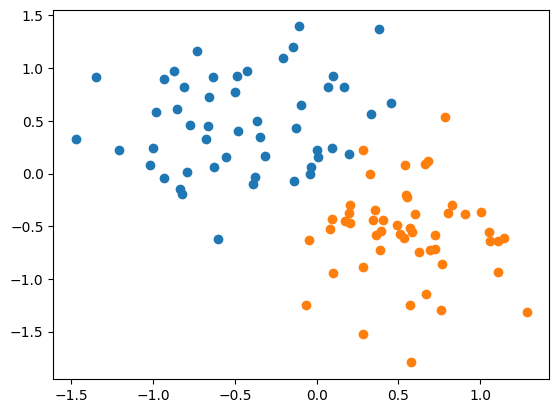

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b = b[0]
# print(w1.item(), w2.item(), b.item())

def get_params():
  return (w1.item(), w2.item(), b.item())

In [8]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

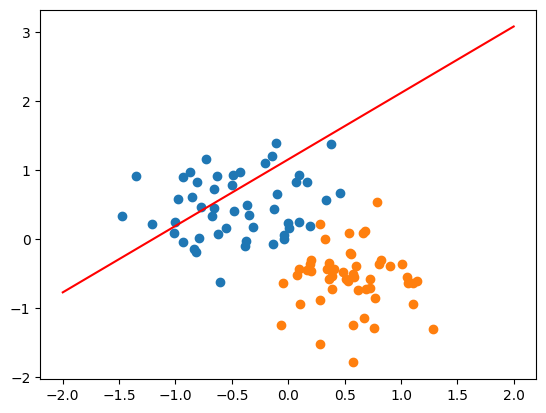

In [9]:
plot_fit("Initial Model")

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [11]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  if (i+1) % 25 == 0:
    print("Epoch: ", i, "Loss: ", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  24 Loss:  0.5943029522895813
Epoch:  49 Loss:  0.571031928062439
Epoch:  74 Loss:  0.5495680570602417
Epoch:  99 Loss:  0.5297437906265259
Epoch:  124 Loss:  0.5114063024520874
Epoch:  149 Loss:  0.4944162666797638
Epoch:  174 Loss:  0.4786478281021118
Epoch:  199 Loss:  0.46398743987083435
Epoch:  224 Loss:  0.450332909822464
Epoch:  249 Loss:  0.43759238719940186
Epoch:  274 Loss:  0.4256835877895355
Epoch:  299 Loss:  0.4145326316356659
Epoch:  324 Loss:  0.40407320857048035
Epoch:  349 Loss:  0.3942459225654602
Epoch:  374 Loss:  0.38499727845191956
Epoch:  399 Loss:  0.3762793242931366
Epoch:  424 Loss:  0.36804884672164917
Epoch:  449 Loss:  0.3602670729160309
Epoch:  474 Loss:  0.3528987467288971
Epoch:  499 Loss:  0.3459121584892273
Epoch:  524 Loss:  0.3392786681652069
Epoch:  549 Loss:  0.3329722583293915
Epoch:  574 Loss:  0.3269692659378052
Epoch:  599 Loss:  0.32124823331832886
Epoch:  624 Loss:  0.3157895803451538
Epoch:  649 Loss:  0.3105755150318146
Epoch:  674 

Text(0.5, 0, 'Epoch')

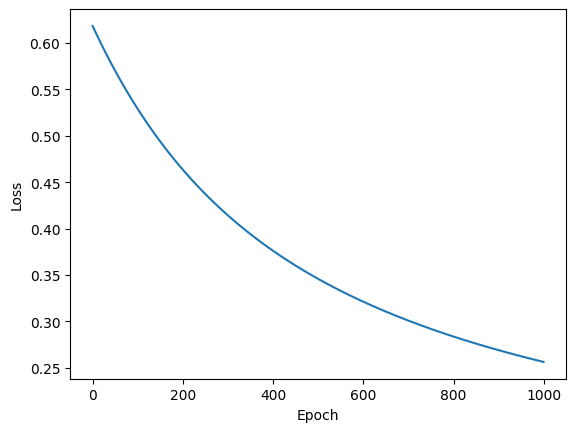

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

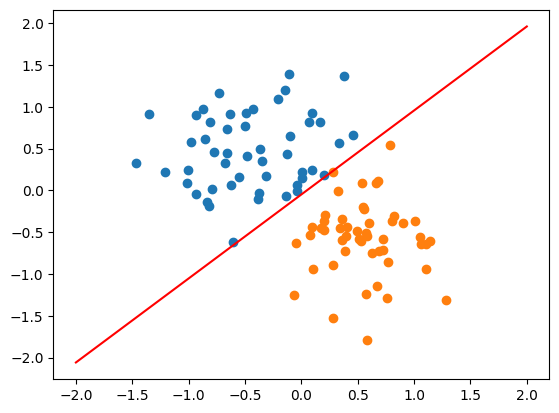

In [13]:
plot_fit('Trained Model')

Red point positive probabilty = 0.9424158334732056 
Black point positive probabilty = 0.05055497586727142 
Red point in class 1 
Black point in class 0 


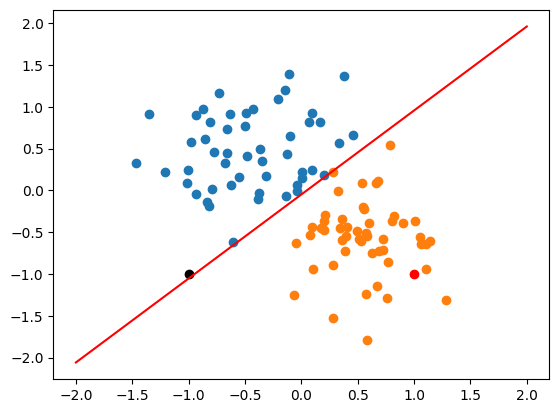

In [16]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point1.numpy()[1], 'ko')
print("Red point positive probabilty = {} ".format(model.forward(point1).item()))
print("Black point positive probabilty = {} ".format(model.forward(point2).item()))
print("Red point in class {} ".format(model.predict(point1)))
print("Black point in class {} ".format(model.predict(point2)))
plot_fit('Trained Model')